<a href="https://colab.research.google.com/github/wlachape/MAT-421/blob/main/Homework_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 8

Finite Difference Approximating

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

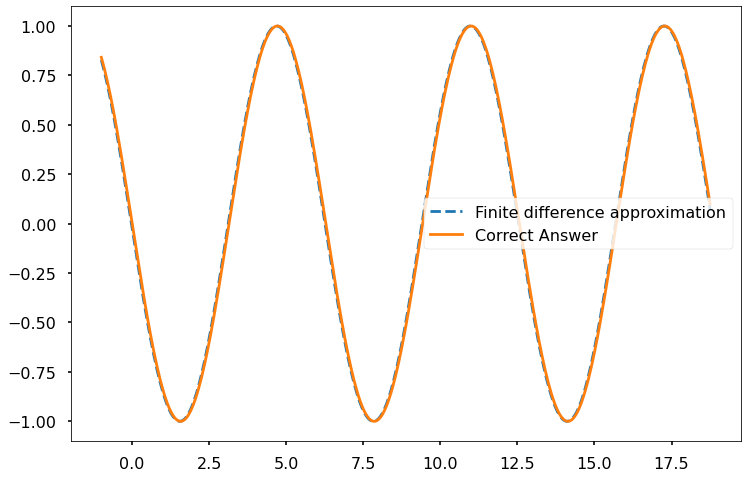

0.024998262842743542


In [15]:
# select difference of two graphs
w = 0.05
# create variable x for the graph
x = np.arange(-1, 6*np.pi, w)
# create variable y to be the actual graph
y = np.cos(x)
# create vector to show differences
finite_diff = np.diff(y)/w
# create grid
x_diff = x[:-1:]
# create an equation to be able to have the correct solution
correct_solution = -np.sin(x_diff)
# create plot
plt.figure(figsize = (12, 8))
plt.plot(x_diff, finite_diff, '--', \
 label = 'Finite difference approximation')
plt.plot(x_diff, correct_solution, \
 label = 'Correct Answer')
plt.legend()
plt.show()
max_error = max(abs(correct_solution - finite_diff))
print(max_error)

Numerical Derivatives using Forward Difference

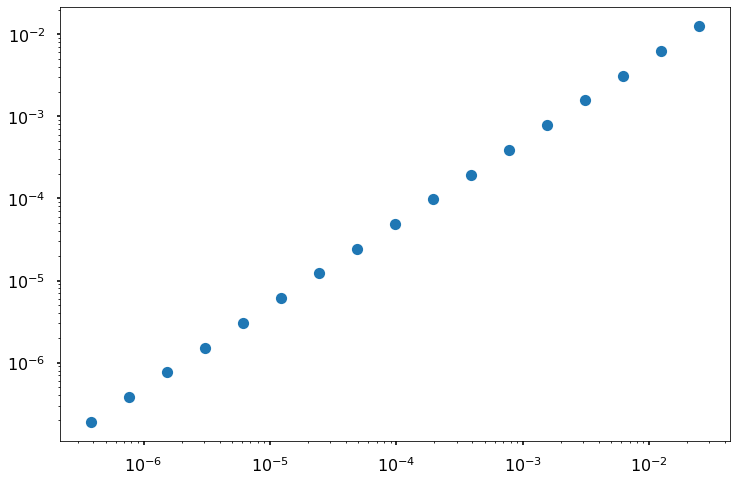

In [37]:
# create iteration size
w = .05
# create number of iterations
iterations = 17
# create list for iteration size
step_size = []
# create list for max error
max_error = []
for i in range(iterations):
 w /= 2
 step_size.append(w)
 x = np.arange(-1, 6*np.pi, w)
 y = np.cos(x)
 finite_diff = np.diff(y)/w
 x_diff = x[:-1]
 correct_solution = -np.sin(x_diff)
 max_error.append(\
 max(abs(correct_solution - finite_diff)))
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'o')
plt.show()

Numerical Error and Instability

In [35]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline 

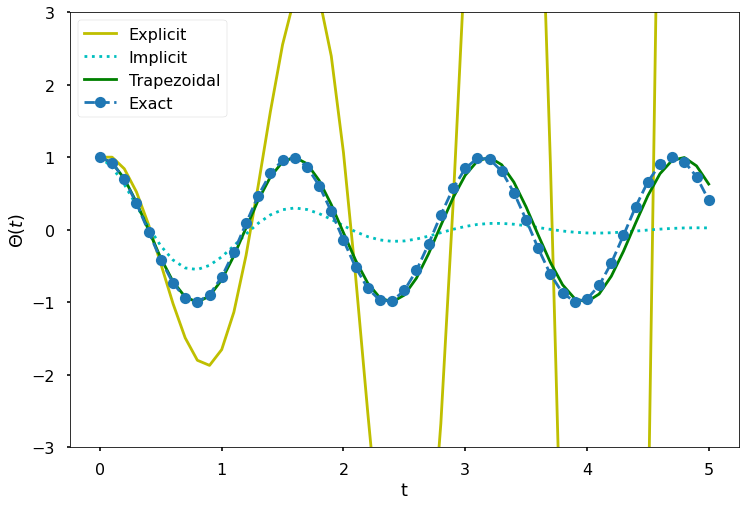

In [53]:
# define step size
w = .1
# define numerical grid
t = np.arange(0, 5.1, w)
# oscillation freq. of pendulum
p = 4
s0 = np.array([[1], [0]])
m_e = np.array([[1, w],
 [-p**2*w, 1]])
m_i = inv(np.array([[1, -w],
 [p**2*w, 1]]))
m_t = np.dot(inv(np.array([[1, -w/2],
 [p**2*w/2,1]])), np.array(
 [[1,w/2], [-p**2*w/2, 1]]))
k_1 = np.zeros((len(t), 2))
k_2 = np.zeros((len(t), 2))
k_3 = np.zeros((len(t), 2))
# do integrations
k_1[0, :] = s0.T
k_2[0, :] = s0.T
k_3[0, :] = s0.T
for j in range(0, len(t)-1):
 k_1[j+1, :] = np.dot(m_e,k_1[j, :])
 k_2[j+1, :] = np.dot(m_i,k_2[j, :])
 k_3[j+1, :] = np.dot(m_t,k_3[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,k_1[:,0],'y-')
plt.plot(t,k_2[:,0],'c:')
plt.plot(t,k_3[:,0],'g')
plt.plot(t, np.cos(p*t), 'o--')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
 'Trapezoidal', 'Exact'])
plt.show()

Numerical Differentiation with Noise

In [59]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

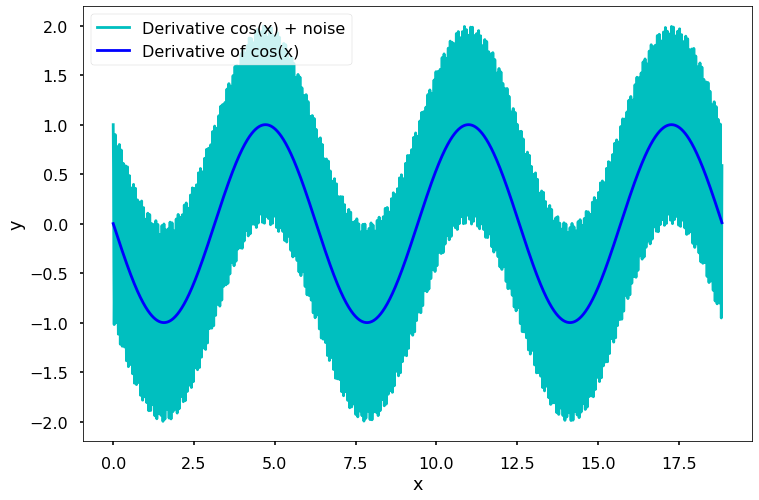

In [63]:
omega = 100
epsilon = 0.01
x = np.arange(0, 6*np.pi, 0.01) 
# compute function
y = -np.sin(x) 
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'c-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()
